In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import pandas as pd

# Load dataset (correct path on Kaggle)
df = pd.read_csv("/kaggle/input/covideda/covid_19_clean_complete.csv")

# Quick overview
print(df.head())
print(df.info())
print(df.describe())


  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
df['Date'] = pd.to_datetime(df['Date'])
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Deaths'] = df['Deaths'].fillna(0)
df['Recovered'] = df['Recovered'].fillna(0)

In [2]:
df['MortalityRate'] = df['Deaths'] / df['Confirmed'] * 100
df['RecoveryRate'] = df['Recovered'] / df['Confirmed'] * 100
top_countries = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(5).index

plt.figure(figsize=(14,6))
for country in top_countries:
    temp = df[df['Country/Region'] == country]
    plt.plot(temp['Date'], temp['Confirmed'], label=country)
plt.title("Top 5 Countries Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()
global_trend = df.groupby('Date')[['Confirmed','Deaths','Recovered']].sum()
plt.plot(global_trend.index, global_trend['Confirmed'], label='Confirmed')
plt.plot(global_trend.index, global_trend['Deaths'], label='Deaths')
plt.plot(global_trend.index, global_trend['Recovered'], label='Recovered')
plt.legend()
plt.show()


NameError: name 'df' is not defined

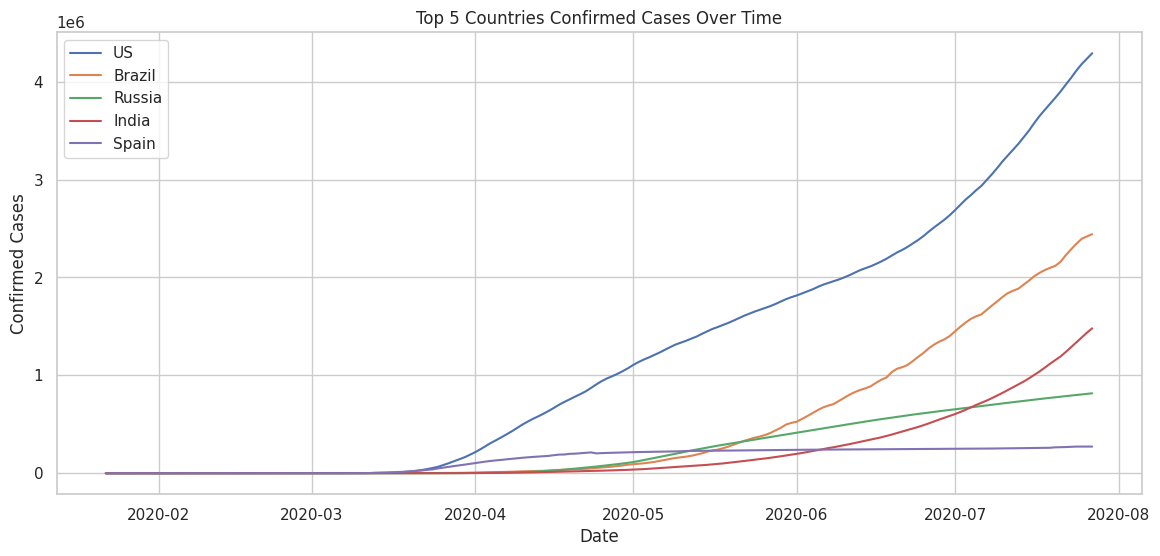

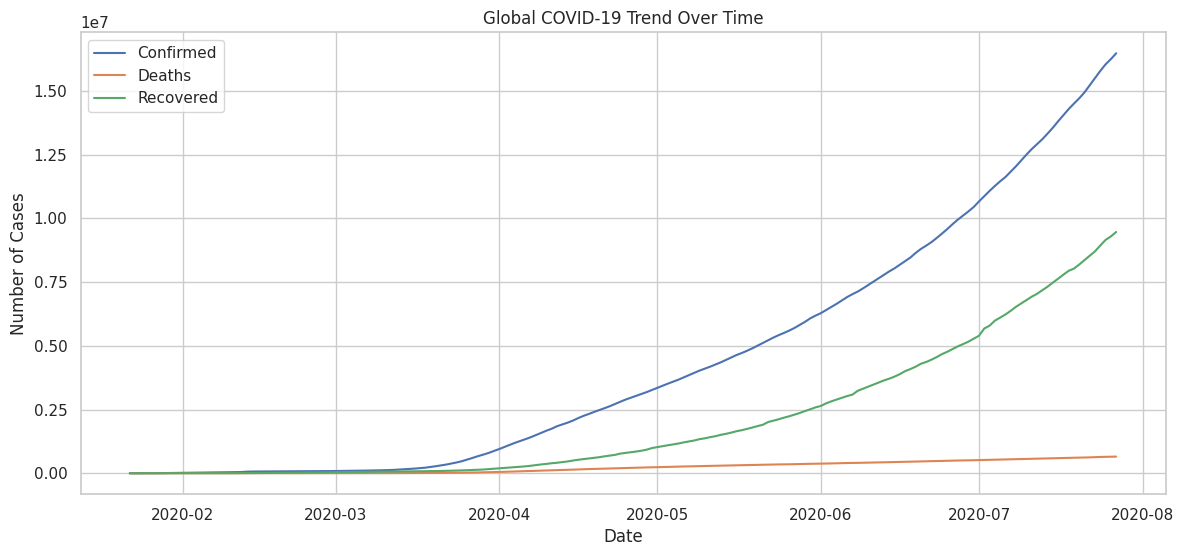

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load dataset (update path if using Kaggle)
df = pd.read_csv("/kaggle/input/covideda/covid_19_clean_complete.csv")

# Rename columns for simplicity
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Fill missing values
df['Confirmed'] = df['Confirmed'].fillna(0)
df['Deaths'] = df['Deaths'].fillna(0)
df['Recovered'] = df['Recovered'].fillna(0)

# Compute Mortality & Recovery Rates
df['MortalityRate'] = df['Deaths'] / df['Confirmed'] * 100
df['RecoveryRate'] = df['Recovered'] / df['Confirmed'] * 100

# Top 5 countries by total confirmed cases
top_countries = df.groupby('Country')['Confirmed'].sum().sort_values(ascending=False).head(5).index
# Plot confirmed cases over time for top countries
plt.figure(figsize=(14,6))
for country in top_countries:
    temp = df[df['Country'] == country]
    plt.plot(temp['Date'], temp['Confirmed'], label=country)
plt.title("Top 5 Countries Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.show()

# Global trend over time
global_trend = df.groupby('Date')[['Confirmed','Deaths','Recovered']].sum()
plt.figure(figsize=(14,6))
plt.plot(global_trend.index, global_trend['Confirmed'], label='Confirmed')
plt.plot(global_trend.index, global_trend['Deaths'], label='Deaths')
plt.plot(global_trend.index, global_trend['Recovered'], label='Recovered')
plt.title("Global COVID-19 Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()
